In [1]:
# Pacotes utilizados
import pandas as pd
import os
import matplotlib.pyplot as plt
import altair as alt
import seaborn as sns

In [3]:
# Uma primeira tentativa, acabou não se concretizando pois mudanças foram feitas nas bases originais e precisei recomeçar
"""dicio = {}
colunas =[]
# Leitura dos dados de cada pasta
for arquivo in os.listdir():
    if arquivo.startswith(("micro",'Micro')):
        caminho_pastas = f"{arquivo}/dados/"
        for i in os.listdir(caminho_pastas):
            if i.startswith("micro"):
                caminho_dados = os.path.basename(i)
        data = (os.path.basename(arquivo))[-4:]
        nome_arquivo = f"censo_{data}"
        dados = pd.read_csv((caminho_pastas + caminho_dados), sep=';', encoding='latin-1')
        colunas.append(list(dados.columns))
        dados = dados.query('NO_REGIAO == "Nordeste"')
        # Check de filtro de região
        print(f"Arquivo '{nome_arquivo}' região filtrada com sucesso!")
        dados = dados[colunas_selecionadas]
        print(f"Arquivo '{nome_arquivo}' colunas filtradas com sucesso!")
        dicio[nome_arquivo] = dados
        # Check de adição ao dicionário
        print(f"Arquivo '{nome_arquivo}' adicionado ao dicionário!")"""

'dicio = {}\ncolunas =[]\n# Leitura dos dados de cada pasta\nfor arquivo in os.listdir():\n    if arquivo.startswith(("micro",\'Micro\')):\n        caminho_pastas = f"{arquivo}/dados/"\n        for i in os.listdir(caminho_pastas):\n            if i.startswith("micro"):\n                caminho_dados = os.path.basename(i)\n        data = (os.path.basename(arquivo))[-4:]\n        nome_arquivo = f"censo_{data}"\n        dados = pd.read_csv((caminho_pastas + caminho_dados), sep=\';\', encoding=\'latin-1\')\n        colunas.append(list(dados.columns))\n        dados = dados.query(\'NO_REGIAO == "Nordeste"\')\n        # Check de filtro de região\n        print(f"Arquivo \'{nome_arquivo}\' região filtrada com sucesso!")\n        dados = dados[colunas_selecionadas]\n        print(f"Arquivo \'{nome_arquivo}\' colunas filtradas com sucesso!")\n        dicio[nome_arquivo] = dados\n        # Check de adição ao dicionário\n        print(f"Arquivo \'{nome_arquivo}\' adicionado ao dicionário!")'

In [17]:
# Carregando e entendendo o objeto que continha os municípios que precisarei filtrar
municipios = pd.read_csv('totalGruposMunicipios.csv', sep=';')
municipios.to_excel('grupos_municipios.xlsx')
municipios = municipios[['municipio_merge','grupo']]
municipios.rename(columns={'municipio_merge':'NO_MUNICIPIO'},inplace=True)
municipios['NO_MUNICIPIO'] = municipios['NO_MUNICIPIO'].astype(str)
print(municipios.columns)


Index(['NO_MUNICIPIO', 'grupo'], dtype='object')


In [20]:
# Carregando e entendendo o objeto que continha os municípios que precisarei filtrar
municipios = pd.read_csv('totalGruposMunicipios.csv', sep=';')
municipios[['municipio_merge','grupo']]

,municipio_merge,grupo
0,São Felipe (BA),Grupo_1 - PropPretos
1,Palmeirândia (MA),Grupo_1 - PropPretos
2,Itacaré (BA),Grupo_1 - PropPretos
3,Aroeiras do Itaim (PI),Grupo_1 - PropPretos
4,Várzea Branca (PI),Grupo_1 - PropPretos
5,Nazaré do Piauí (PI),Grupo_1 - PropPretos
6,Aramari (BA),Grupo_1 - PropPretos
7,Itaeté (BA),Grupo_1 - PropPretos
8,Wenceslau Guimarães (BA),Grupo_1 - PropPretos
9,Campinas do Piauí (PI),Grupo_1 - PropPretos


In [3]:
# Inicialização de Dicionários
dicio = {}             # Armazena as bases de dados finais processadas
prim_agreg = {}        # Contém informações para agregação por município (nível escola)
seg_agreg = {}         # Contém informações para agregação por município (nível grupo)

# Processamento dos Arquivos
for arquivo in os.listdir():  
    if arquivo.startswith('base'):  # Filtra apenas arquivos que começam com "base"

        # Extração de Informações do Arquivo
        caminho_dados = os.path.basename(arquivo)  # Obtém o nome do arquivo
        data = (os.path.basename(arquivo))[-8:-4]  # Extrai o ano (ex: 2023 de 'base_2023.csv')
        nome_arquivo = f"censo_{data}"             # Cria um nome para a base final (ex: 'censo_2023')

        # Leitura e Pré-processamento dos Dados
        dados = pd.read_csv(caminho_dados, sep=',', encoding='latin-1')
        dados['NO_MUNICIPIO'] = dados['NO_MUNICIPIO'] + ' ' + '(' + dados['SG_UF'] + ')'  # Formata o nome do município
        dados = dados[dados['NO_MUNICIPIO'].isin(municipios['NO_MUNICIPIO'])]  # Filtra pelos municípios desejados
        dados.rename(columns={"Ãndice_de_Infraestrutura_Escolar": 'Indice_infra'}, inplace=True)  # Renomeia coluna
        dados.drop(columns=['NO_ENTIDADE','CO_UF','CO_MUNICIPIO', 'SG_UF','NO_UF'], inplace=True)  # Remove colunas desnecessárias

        # Definição das Agregações (Nível Escola)
        for column in dados.columns:
            if column.startswith('QT'):  # Colunas que começam com 'QT' serão somadas
                prim_agreg[column] = (column, 'sum')
            else:                        # Demais colunas terão valores únicos
                prim_agreg[column] = (column, 'unique')
        prim_agreg['Indice_infra'] = ('Indice_infra', 'mean')  # Índice de infraestrutura será calculado pela média

        # Agregação dos Dados (Nível Escola)
        dados = dados.groupby("NO_MUNICIPIO").agg(**prim_agreg)
        dados.reset_index(drop=True, inplace=True)

        # Limpeza de Dados (Remoção de Colchetes)
        dados['NO_MUNICIPIO'] = dados['NO_MUNICIPIO'].astype(str).str.replace('[', '', regex=False).str.replace(']', '', regex=False)
        dados['NO_MUNICIPIO'] = dados['NO_MUNICIPIO'].astype(str).str.replace("'", '', regex=False).str.replace("'", '', regex=False)

        # Mesclagem com Dados de Municípios (presumindo que você tenha um DataFrame 'municipios')
        dados = pd.merge(dados, municipios, how='left')

        # Definição das Agregações (Nível Grupo)
        for column in dados.columns:
            if column.startswith('NO') or column == 'grupo':  # Colunas com 'NO' ou 'grupo' terão valores únicos
                seg_agreg[column] = (column, 'unique')
            else:                                          # Demais colunas terão médias calculadas
                seg_agreg[column] = (column,'mean')

        # Agregação dos Dados (Nível Grupo)
        dados = dados.groupby("grupo").agg(**seg_agreg)

        # Remove colunas pós gfrupamento
        dados.drop(columns=['grupo','NO_MUNICIPIO'], inplace=True)  

        # Adição do Ano aos Dados
        dados['ano'] = data

        # Armazenamento da Base Final no Dicionário
        dicio[nome_arquivo] = dados

        # Confirmação da Adição ao Dicionário
        print(f"Arquivo '{nome_arquivo}' adicionado ao dicionário!")


Arquivo 'censo_2010' adicionado ao dicionário!
Arquivo 'censo_2011' adicionado ao dicionário!
Arquivo 'censo_2012' adicionado ao dicionário!
Arquivo 'censo_2013' adicionado ao dicionário!
Arquivo 'censo_2014' adicionado ao dicionário!
Arquivo 'censo_2015' adicionado ao dicionário!
Arquivo 'censo_2016' adicionado ao dicionário!
Arquivo 'censo_2017' adicionado ao dicionário!
Arquivo 'censo_2018' adicionado ao dicionário!
Arquivo 'censo_2019' adicionado ao dicionário!
Arquivo 'censo_2020' adicionado ao dicionário!
Arquivo 'censo_2021' adicionado ao dicionário!
Arquivo 'censo_2022' adicionado ao dicionário!
Arquivo 'censo_2023' adicionado ao dicionário!


In [4]:
teste = list(dicio.items())[1][1]

In [5]:
# Entendendo resultado final 
print(type(teste['ano']))
teste

<class 'pandas.core.series.Series'>


,QT_MAT_BAS,QT_MAT_INF,QT_MAT_INF_CRE,QT_MAT_INF_PRE,QT_MAT_FUND,QT_MAT_MED,QT_MAT_PROF,QT_MAT_INF_INT,QT_MAT_INF_CRE_INT,QT_MAT_INF_PRE_INT,QT_MAT_FUND_INT,QT_MAT_MED_INT,Indice_infra,ano
grupo,,,,,,,,,,,,,,
Grupo_1 - PropPretos,4156.937500,500.4375,101.875000,398.562500,2473.687500,513.750000,40.375000,58.312500,51.750000,6.562500,9.375000,0.000000,0.244510,2011
Grupo_2 - IDH,4141.125000,600.6250,141.187500,459.437500,2632.437500,520.687500,12.250000,34.125000,28.375000,5.750000,119.750000,4.187500,0.224696,2011
Grupo_3 - Santa Luzia do Itanhy,4494.000000,599.0000,0.000000,599.000000,3053.000000,259.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.361557,2011
Grupo_5 - Isolados,2076.181818,291.0000,91.090909,199.909091,1303.818182,352.181818,57.545455,87.727273,31.363636,56.363636,132.636364,11.727273,0.298233,2011


In [6]:
df = pd.concat(dicio.values())
print(df)

                                  QT_MAT_BAS  QT_MAT_INF  QT_MAT_INF_CRE  \
grupo                                                                      
Grupo_1 - PropPretos             4218.000000  494.375000       95.812500   
Grupo_2 - IDH                    4292.750000  625.437500      140.750000   
Grupo_3 - Santa Luzia do Itanhy  4795.000000  803.000000        0.000000   
Grupo_5 - Isolados               2141.090909  322.363636       77.454545   
Grupo_1 - PropPretos             4156.937500  500.437500      101.875000   
Grupo_2 - IDH                    4141.125000  600.625000      141.187500   
Grupo_3 - Santa Luzia do Itanhy  4494.000000  599.000000        0.000000   
Grupo_5 - Isolados               2076.181818  291.000000       91.090909   
Grupo_1 - PropPretos             3933.437500  478.500000       99.187500   
Grupo_2 - IDH                    4019.625000  582.375000      143.062500   
Grupo_3 - Santa Luzia do Itanhy  4285.000000  603.000000       52.000000   
Grupo_5 - Is

In [9]:
df.index

Index(['Grupo_1 - Santa Luzia do Itanhy', 'Grupo_2 - IDH',
       'Grupo_3 - PropPretos', 'Grupo_4 - Proximidade',
       'Grupo_1 - Santa Luzia do Itanhy', 'Grupo_2 - IDH',
       'Grupo_3 - PropPretos', 'Grupo_4 - Proximidade',
       'Grupo_1 - Santa Luzia do Itanhy', 'Grupo_2 - IDH',
       'Grupo_3 - PropPretos', 'Grupo_4 - Proximidade',
       'Grupo_1 - Santa Luzia do Itanhy', 'Grupo_2 - IDH',
       'Grupo_3 - PropPretos', 'Grupo_4 - Proximidade',
       'Grupo_1 - Santa Luzia do Itanhy', 'Grupo_2 - IDH',
       'Grupo_3 - PropPretos', 'Grupo_4 - Proximidade',
       'Grupo_1 - Santa Luzia do Itanhy', 'Grupo_2 - IDH',
       'Grupo_3 - PropPretos', 'Grupo_4 - Proximidade',
       'Grupo_1 - Santa Luzia do Itanhy', 'Grupo_2 - IDH',
       'Grupo_3 - PropPretos', 'Grupo_4 - Proximidade',
       'Grupo_1 - Santa Luzia do Itanhy', 'Grupo_2 - IDH',
       'Grupo_3 - PropPretos', 'Grupo_4 - Proximidade',
       'Grupo_1 - Santa Luzia do Itanhy', 'Grupo_2 - IDH',
       'Grupo_3 - Pro

In [7]:
df.to_csv('censo_filtrado_sem_prox.csv', index = False)

In [8]:
# Agregação de acordo com grupos
df.head()

,QT_MAT_BAS,QT_MAT_INF,QT_MAT_INF_CRE,QT_MAT_INF_PRE,QT_MAT_FUND,QT_MAT_MED,QT_MAT_PROF,QT_MAT_INF_INT,QT_MAT_INF_CRE_INT,QT_MAT_INF_PRE_INT,QT_MAT_FUND_INT,QT_MAT_MED_INT,Indice_infra,ano
grupo,,,,,,,,,,,,,,
Grupo_1 - PropPretos,4218.000000,494.375000,95.812500,398.562500,2584.312500,512.937500,40.000000,55.375000,52.562500,2.812500,18.062500,0.000000,0.294807,2010
Grupo_2 - IDH,4292.750000,625.437500,140.750000,484.687500,2723.500000,554.375000,46.125000,41.687500,34.562500,7.125000,3.937500,0.000000,0.269777,2010
Grupo_3 - Santa Luzia do Itanhy,4795.000000,803.000000,0.000000,803.000000,3172.000000,284.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.435859,2010
Grupo_5 - Isolados,2141.090909,322.363636,77.454545,244.909091,1353.727273,319.181818,52.545455,86.545455,6.727273,79.818182,59.363636,14.181818,0.357758,2010
Grupo_1 - PropPretos,4156.937500,500.437500,101.875000,398.562500,2473.687500,513.750000,40.375000,58.312500,51.750000,6.562500,9.375000,0.000000,0.244510,2011


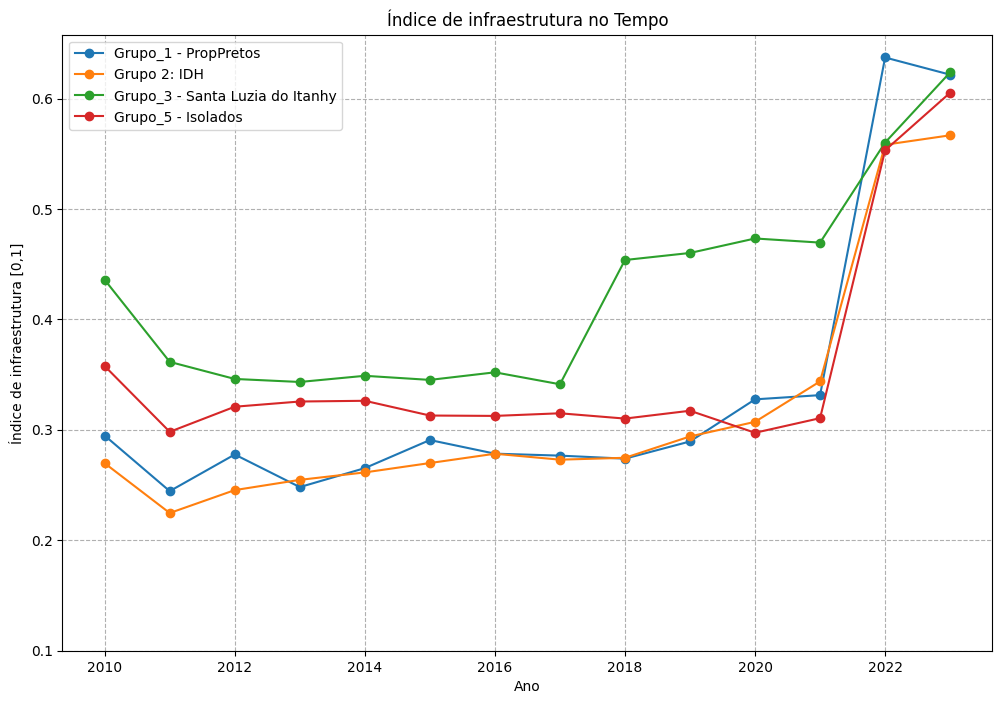

In [10]:
# Ensure that 'ano' is in a numeric format
df['ano'] = pd.to_numeric(df['ano'], errors='coerce')

# Create the figure and axis 
plt.figure(figsize=(12, 8))  

# Mapping of group names to formatted labels (adjust these as needed)
group_labels = {
    'Grupo_1 - Santa Luzia do Itanhy': 'Grupo 1: Santa Luzia do Itanhy',
    'Grupo_2 - IDH': 'Grupo 2: IDH',
    'Grupo_3 - PropPretos': 'Grupo 3: Proporção de Pretos',
    'Grupo_4 - Proximidade': 'Grupo 4: Proximidade'
}

# Plot for each group on the same axes
for group_name, group_data in df.groupby('grupo'):
    group_data = group_data.sort_values(by='ano')

    # Get the formatted label or use the original group name if not found
    label = group_labels.get(group_name, group_name)

    plt.plot(group_data['ano'], group_data['Indice_infra'], label=label, marker='o')

# Plot customizations
plt.title('Índice de infraestrutura no Tempo')
plt.xlabel('Ano')
plt.ylabel('Índice de infraestrutura [0,1]')
plt.legend()
plt.grid(axis='both', linestyle='--')

# Set the y-axis limits (starting at 0.1)
plt.ylim(0.1, plt.ylim()[1])  

# Show the plot
plt.show()


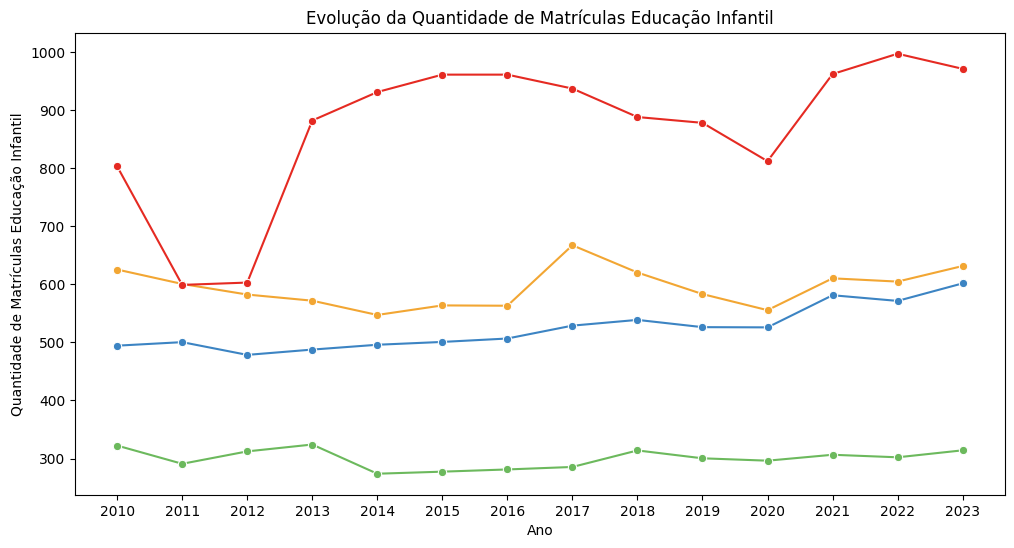

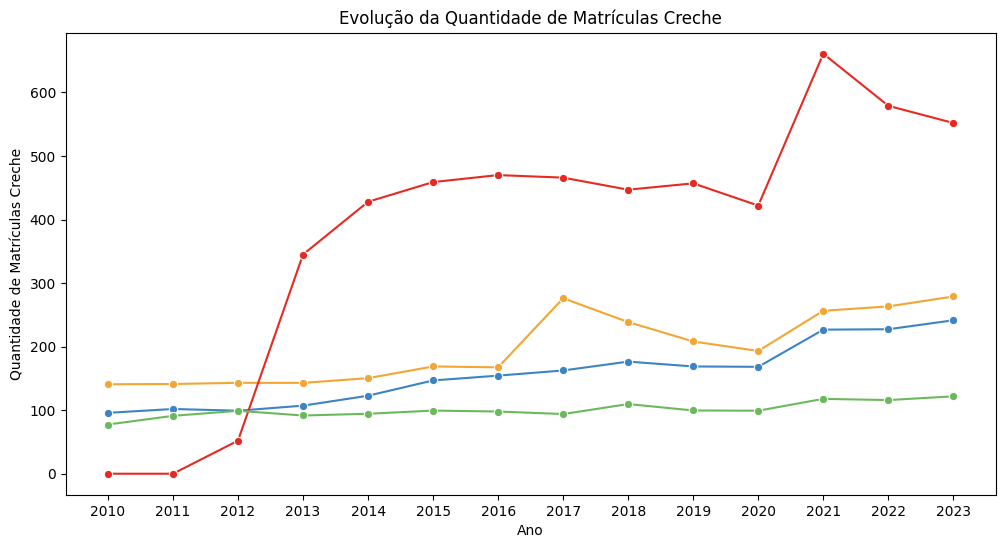

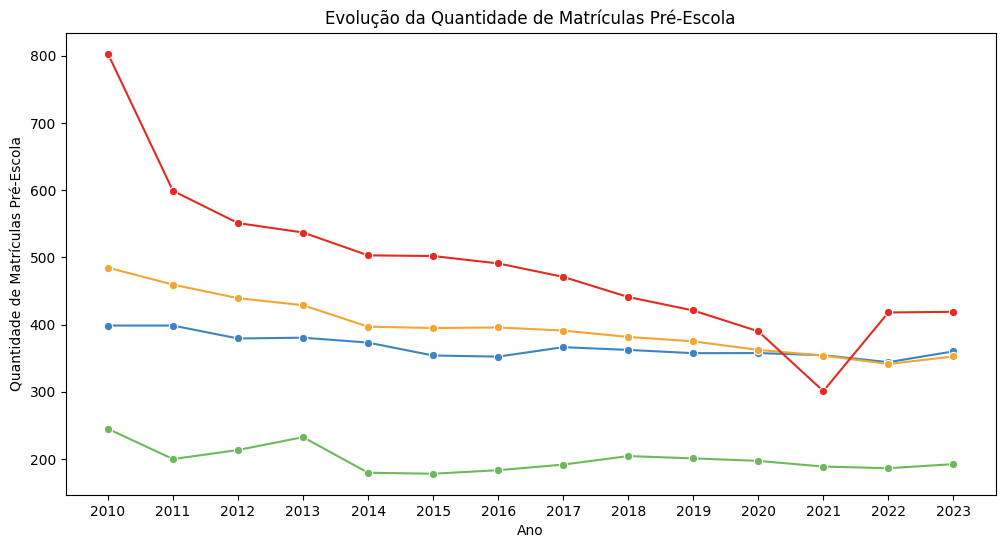

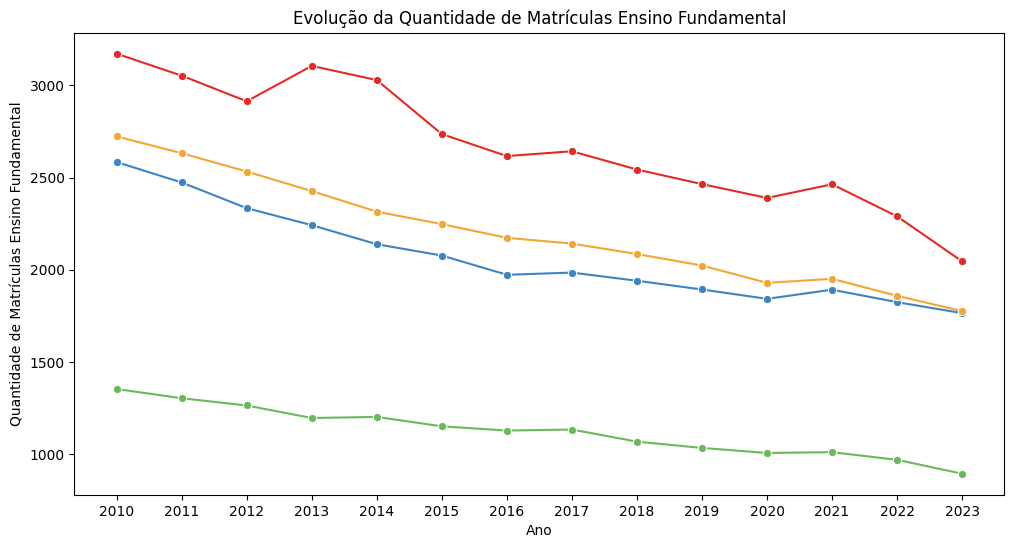

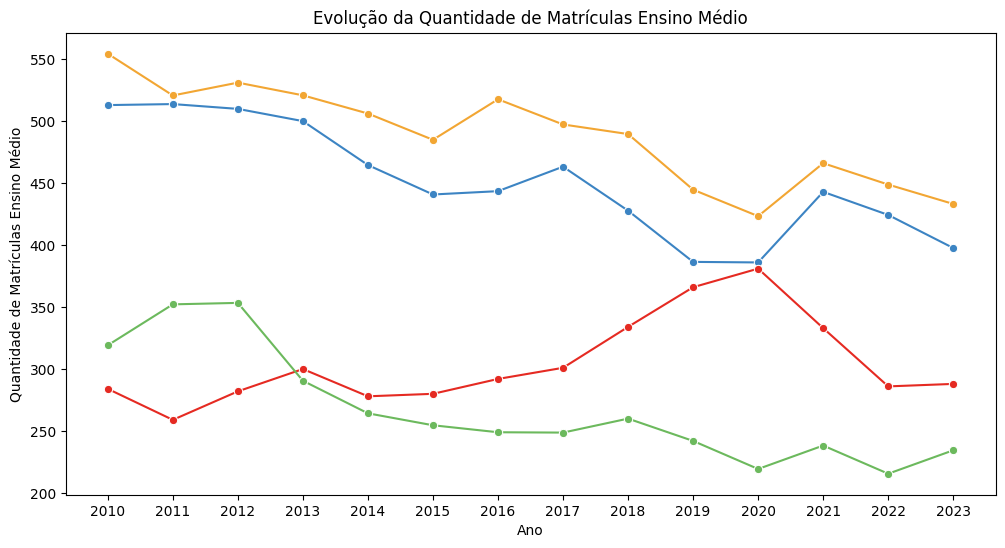

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Dicionário com os rótulos completos
rotulos_completos = {
    'QT_MAT_INF': 'Quantidade de Matrículas Educação Infantil',
    'QT_MAT_INF_CRE': 'Quantidade de Matrículas Creche',
    'QT_MAT_INF_PRE': 'Quantidade de Matrículas Pré-Escola',
    'QT_MAT_FUND': 'Quantidade de Matrículas Ensino Fundamental',
    'QT_MAT_MED': 'Quantidade de Matrículas Ensino Médio'
}

colunas_para_plotar = ['QT_MAT_INF', 'QT_MAT_INF_CRE', 'QT_MAT_INF_PRE', 'QT_MAT_FUND', 'QT_MAT_MED']

# Definindo cores personalizadas (ajuste conforme necessário)
cores = ['#3c84c3', '#f2a633', '#e52a22', '#6cb95d']

# Criando os gráficos
for coluna in colunas_para_plotar:
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='ano', y=coluna, hue='grupo', data=df, marker='o', palette=cores, legend=False)
    plt.title(f'Evolução da {rotulos_completos.get(coluna, coluna)}')
    plt.xlabel('Ano')
    plt.ylabel(rotulos_completos.get(coluna, coluna))
    plt.xticks(df['ano'].unique())
    plt.show()


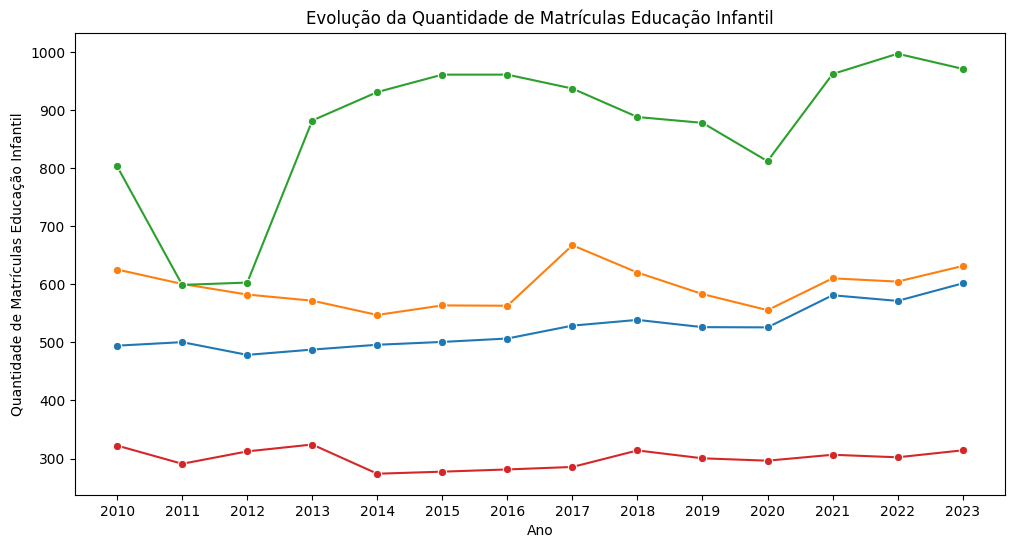

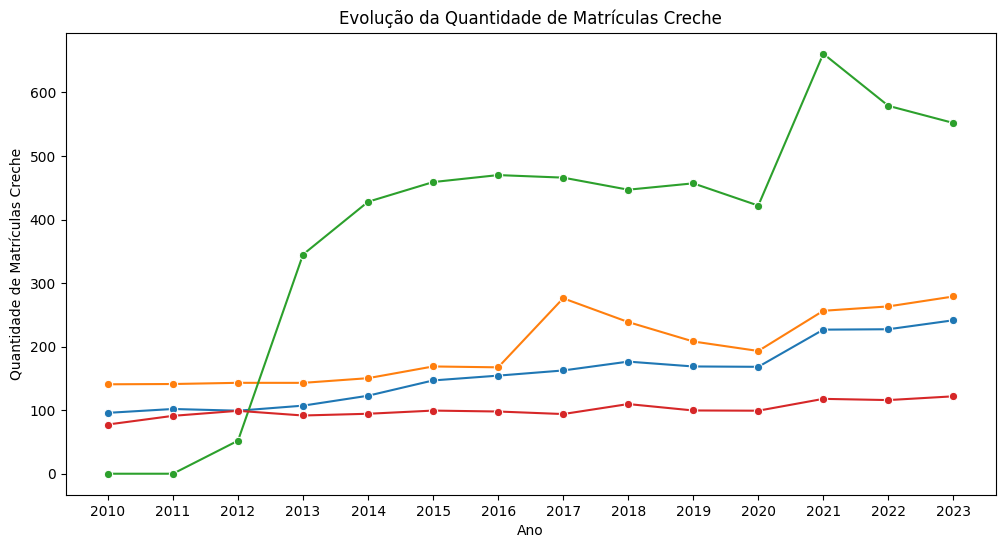

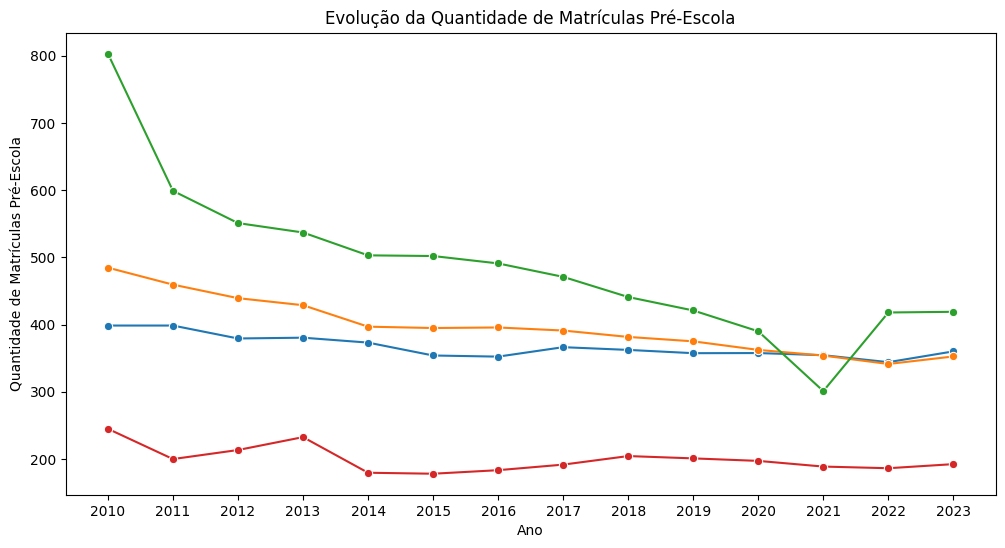

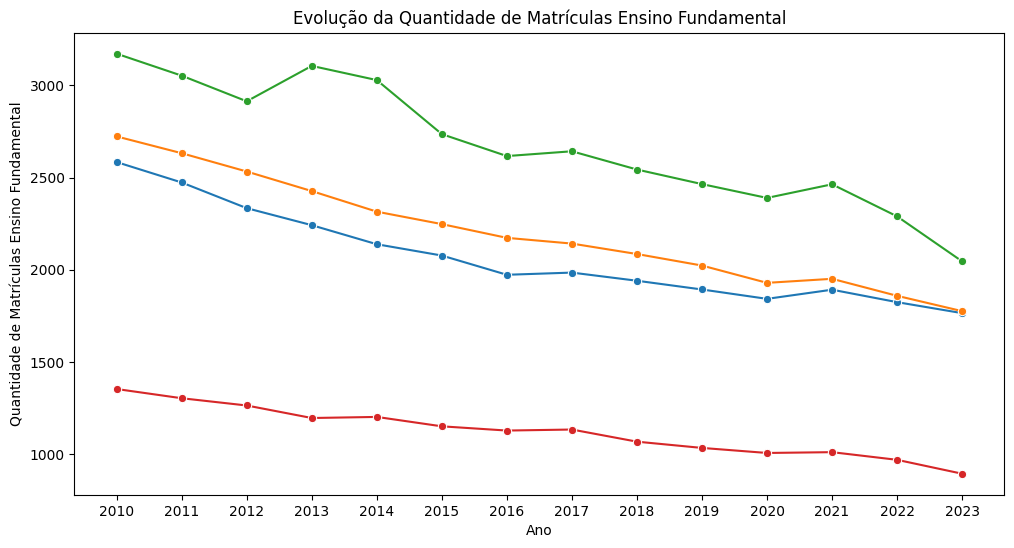

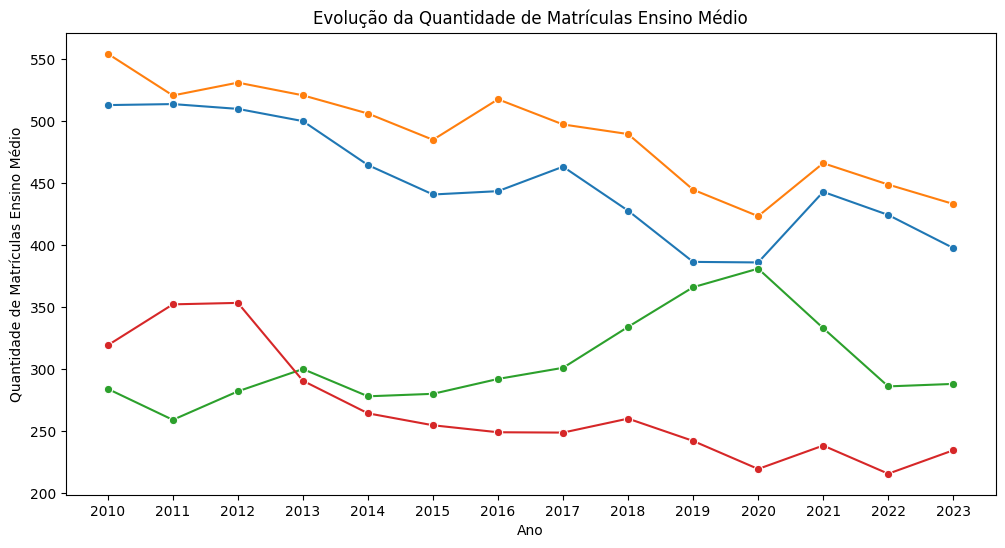

In [14]:

# Dicionário com os rótulos completos
rotulos_completos = {
    'QT_MAT_INF': 'Quantidade de Matrículas Educação Infantil',
    'QT_MAT_INF_CRE': 'Quantidade de Matrículas Creche',
    'QT_MAT_INF_PRE': 'Quantidade de Matrículas Pré-Escola',
    'QT_MAT_FUND': 'Quantidade de Matrículas Ensino Fundamental',
    'QT_MAT_MED': 'Quantidade de Matrículas Ensino Médio'
}

colunas_para_plotar = ['QT_MAT_INF', 'QT_MAT_INF_CRE', 'QT_MAT_INF_PRE', 'QT_MAT_FUND', 'QT_MAT_MED']

for coluna in colunas_para_plotar:
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='ano', y=coluna, hue='grupo', data=df, marker='o', legend=False)
    plt.title(f'Evolução da {rotulos_completos.get(coluna, coluna)}')
    plt.xlabel('Ano')
    plt.ylabel(rotulos_completos.get(coluna, coluna))
    plt.xticks(df['ano'].unique())
    plt.show()


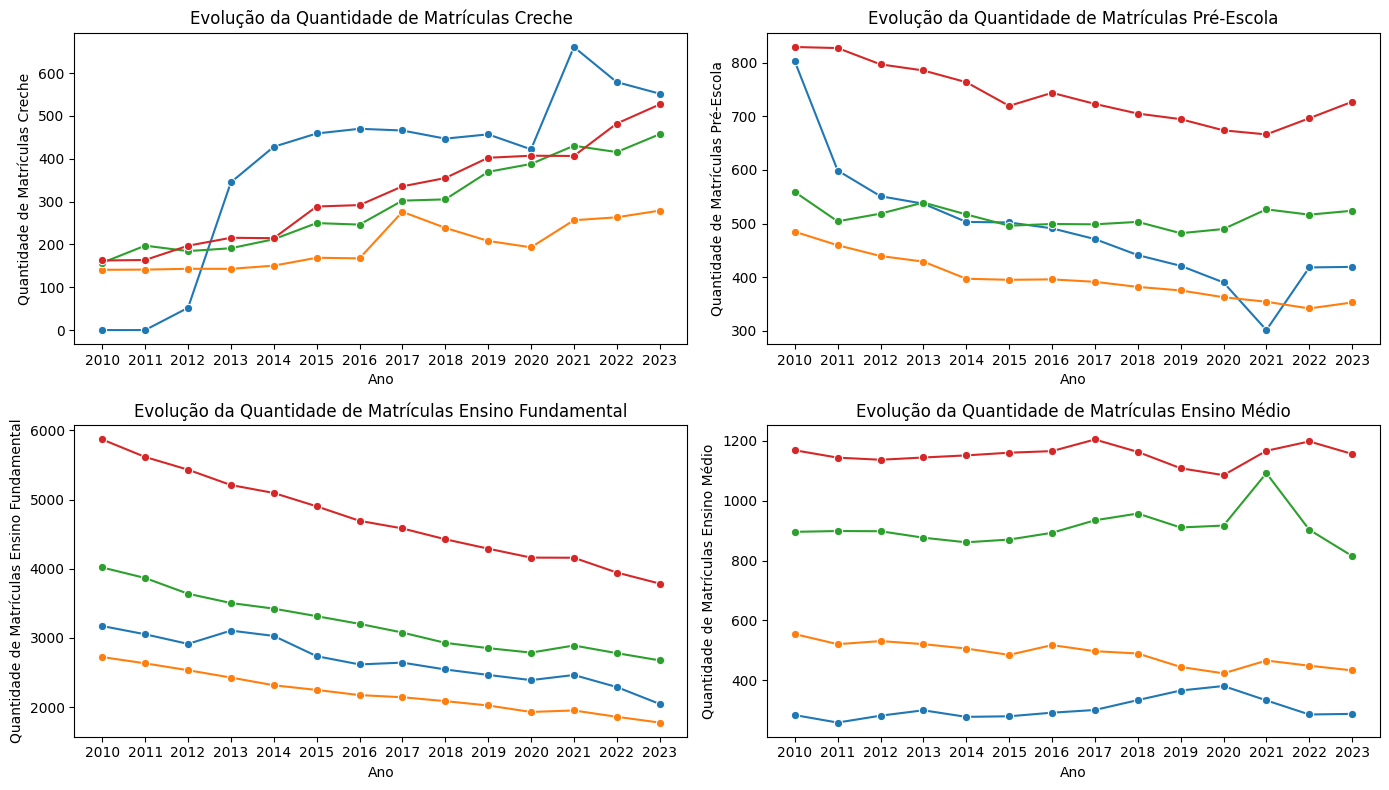

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Dicionário com os rótulos completos (sem 'QT_MAT_INF')
rotulos_completos = {
    'QT_MAT_INF_CRE': 'Quantidade de Matrículas Creche',
    'QT_MAT_INF_PRE': 'Quantidade de Matrículas Pré-Escola',
    'QT_MAT_FUND': 'Quantidade de Matrículas Ensino Fundamental',
    'QT_MAT_MED': 'Quantidade de Matrículas Ensino Médio'
}

# Lista de colunas para plotar (sem 'QT_MAT_INF')
colunas_para_plotar = ['QT_MAT_INF_CRE', 'QT_MAT_INF_PRE', 'QT_MAT_FUND', 'QT_MAT_MED']

# Criando a figura com subplots em um grid 2x2
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 8))  # Ajuste o figsize se necessário

# Loop para criar os gráficos em cada subplot
for i, coluna in enumerate(colunas_para_plotar):
    linha = i // 2  # Calcula a linha do subplot (0 ou 1)
    coluna_grid = i % 2  # Calcula a coluna do subplot (0 ou 1)

    sns.lineplot(x='ano', y=coluna, hue='grupo', data=df, marker='o', legend=False, ax=axes[linha, coluna_grid])

    axes[linha, coluna_grid].set_title(f'Evolução da {rotulos_completos.get(coluna, coluna)}')
    axes[linha, coluna_grid].set_xlabel('Ano')
    axes[linha, coluna_grid].set_ylabel(rotulos_completos.get(coluna, coluna))
    axes[linha, coluna_grid].set_xticks(df['ano'].unique())

# Ajustando o espaçamento entre os subplots
plt.tight_layout()

# Mostrando a figura com todos os gráficos
plt.show()


In [15]:
# Function to calculate and add proportion columns
def add_proportion_columns(df):
    int_cols = [col for col in df.columns if col.endswith('_INT')]  # Get columns ending with '_INT'

    for int_col in int_cols:
        base_col = int_col.replace('_INT', '')  # Get the corresponding base column
        
        # Check if the base column exists in the DataFrame
        if base_col in df.columns:
            proportion_col = f'Prop_{base_col}'  
            df[proportion_col] = df[int_col] / (df[int_col] + df[base_col])  # Calculate and add the proportion column
        else:
            print(f"Warning: Base column '{base_col}' not found for '{int_col}'. Skipping.")

# Apply the function to your DataFrame
add_proportion_columns(df)

df.head()


,QT_MAT_BAS,QT_MAT_INF,QT_MAT_INF_CRE,QT_MAT_INF_PRE,QT_MAT_FUND,QT_MAT_MED,QT_MAT_PROF,QT_MAT_INF_INT,QT_MAT_INF_CRE_INT,QT_MAT_INF_PRE_INT,QT_MAT_FUND_INT,QT_MAT_MED_INT,Indice_infra,ano,Prop_QT_MAT_INF,Prop_QT_MAT_INF_CRE,Prop_QT_MAT_INF_PRE,Prop_QT_MAT_FUND,Prop_QT_MAT_MED
grupo,,,,,,,,,,,,,,,,,,,
Grupo_1 - Santa Luzia do Itanhy,4795.000,803.0000,0.000,803.0000,3172.0000,284.0000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.435859,2010,0.000000,NaN,0.000000,0.000000,0.000000
Grupo_2 - IDH,4292.750,625.4375,140.750,484.6875,2723.5000,554.3750,46.125,41.6875,34.5625,7.1250,3.9375,0.0000,0.269777,2010,0.062488,0.197148,0.014487,0.001444,0.000000
Grupo_3 - PropPretos,6411.125,716.0625,157.125,558.9375,4018.8125,895.7500,129.375,135.2500,110.8125,24.4375,9.0625,6.8750,0.330940,2010,0.158872,0.413576,0.041890,0.002250,0.007617
Grupo_4 - Proximidade,8928.375,992.2500,162.500,829.7500,5869.8125,1168.0625,163.250,92.0625,76.6250,15.4375,40.6250,23.9375,0.404230,2010,0.084904,0.320439,0.018265,0.006873,0.020082
Grupo_1 - Santa Luzia do Itanhy,4494.000,599.0000,0.000,599.0000,3053.0000,259.0000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.361557,2011,0.000000,NaN,0.000000,0.000000,0.000000


In [16]:
"""# Ensure that 'ano' is in a numeric format
df['ano'] = pd.to_numeric(df['ano'], errors='coerce')

# Columns to plot proportions for
proportion_columns = ['Prop_QT_MAT_INF', 'Prop_QT_MAT_INF_CRE', 'Prop_QT_MAT_INF_PRE', 'Prop_QT_MAT_FUND', 'Prop_QT_MAT_MED']

# Group your DataFrame by 'grupo'
grouped = df.groupby('grupo')

# Create a figure and axes for subplots
fig, axes = plt.subplots(nrows=1, ncols=len(grouped), figsize=(15, 6))

# Plot each group in a separate subplot
for (group_name, group_data), ax in zip(grouped, axes):
    # Sort the group data by 'ano' (year)
    group_data = group_data.sort_values(by='ano')

    # Plot each proportion column against 'ano'
    for prop_col in proportion_columns:
        ax.plot(group_data['ano'], group_data[prop_col], label=prop_col)

    # Customize the plot
    ax.set_title(group_name)
    ax.set_xlabel('Ano')
    ax.set_ylabel('Proportion')
    ax.legend()

plt.tight_layout()  # Adjust spacing between subplots
plt.show()
"""

"# Ensure that 'ano' is in a numeric format\ndf['ano'] = pd.to_numeric(df['ano'], errors='coerce')\n\n# Columns to plot proportions for\nproportion_columns = ['Prop_QT_MAT_INF', 'Prop_QT_MAT_INF_CRE', 'Prop_QT_MAT_INF_PRE', 'Prop_QT_MAT_FUND', 'Prop_QT_MAT_MED']\n\n# Group your DataFrame by 'grupo'\ngrouped = df.groupby('grupo')\n\n# Create a figure and axes for subplots\nfig, axes = plt.subplots(nrows=1, ncols=len(grouped), figsize=(15, 6))\n\n# Plot each group in a separate subplot\nfor (group_name, group_data), ax in zip(grouped, axes):\n    # Sort the group data by 'ano' (year)\n    group_data = group_data.sort_values(by='ano')\n\n    # Plot each proportion column against 'ano'\n    for prop_col in proportion_columns:\n        ax.plot(group_data['ano'], group_data[prop_col], label=prop_col)\n\n    # Customize the plot\n    ax.set_title(group_name)\n    ax.set_xlabel('Ano')\n    ax.set_ylabel('Proportion')\n    ax.legend()\n\nplt.tight_layout()  # Adjust spacing between subplots\npl

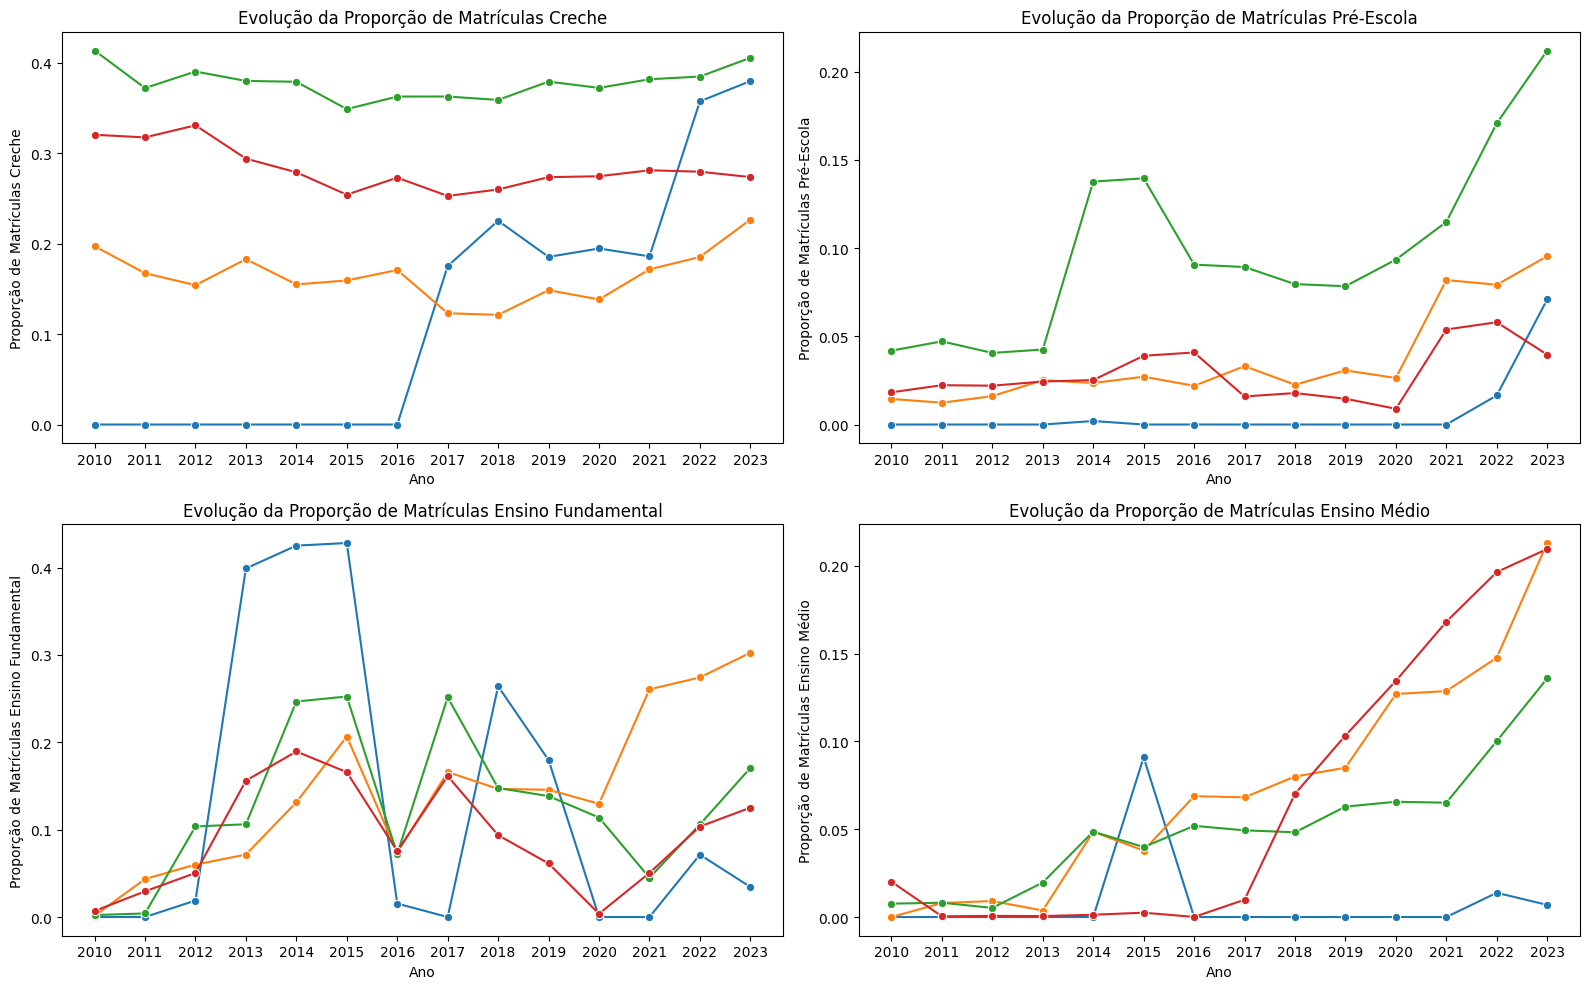

In [17]:
# Drop missing values in `Prop_QT_MAT_INF_CRE`
df['Prop_QT_MAT_INF_CRE'] = df['Prop_QT_MAT_INF_CRE'].fillna(0)


# Dicionário com os rótulos completos das variáveis de proporção
rotulos_completos_prop = {
    'Prop_QT_MAT_INF_CRE': 'Proporção de Matrículas Creche',
    'Prop_QT_MAT_INF_PRE': 'Proporção de Matrículas Pré-Escola',
    'Prop_QT_MAT_FUND': 'Proporção de Matrículas Ensino Fundamental',
    'Prop_QT_MAT_MED': 'Proporção de Matrículas Ensino Médio'
}

# Lista de colunas de proporção para plotar
colunas_para_plotar_prop = ['Prop_QT_MAT_INF_CRE', 'Prop_QT_MAT_INF_PRE', 'Prop_QT_MAT_FUND', 'Prop_QT_MAT_MED']

# Criando a figura com subplots em um grid 2x2
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))

# Loop para criar os gráficos em cada subplot
for i, coluna in enumerate(colunas_para_plotar_prop):
    linha = i // 2
    coluna_grid = i % 2

    sns.lineplot(x='ano', y=coluna, hue='grupo', data=df, marker='o',legend=False, ax=axes[linha, coluna_grid])

    axes[linha, coluna_grid].set_title(f'Evolução da {rotulos_completos_prop.get(coluna, coluna)}')
    axes[linha, coluna_grid].set_xlabel('Ano')
    axes[linha, coluna_grid].set_ylabel(rotulos_completos_prop.get(coluna, coluna))
    axes[linha, coluna_grid].set_xticks(df['ano'].unique())

# Ajustando o espaçamento entre os subplots
plt.tight_layout()

# Mostrando a figura com todos os gráficos
plt.show()

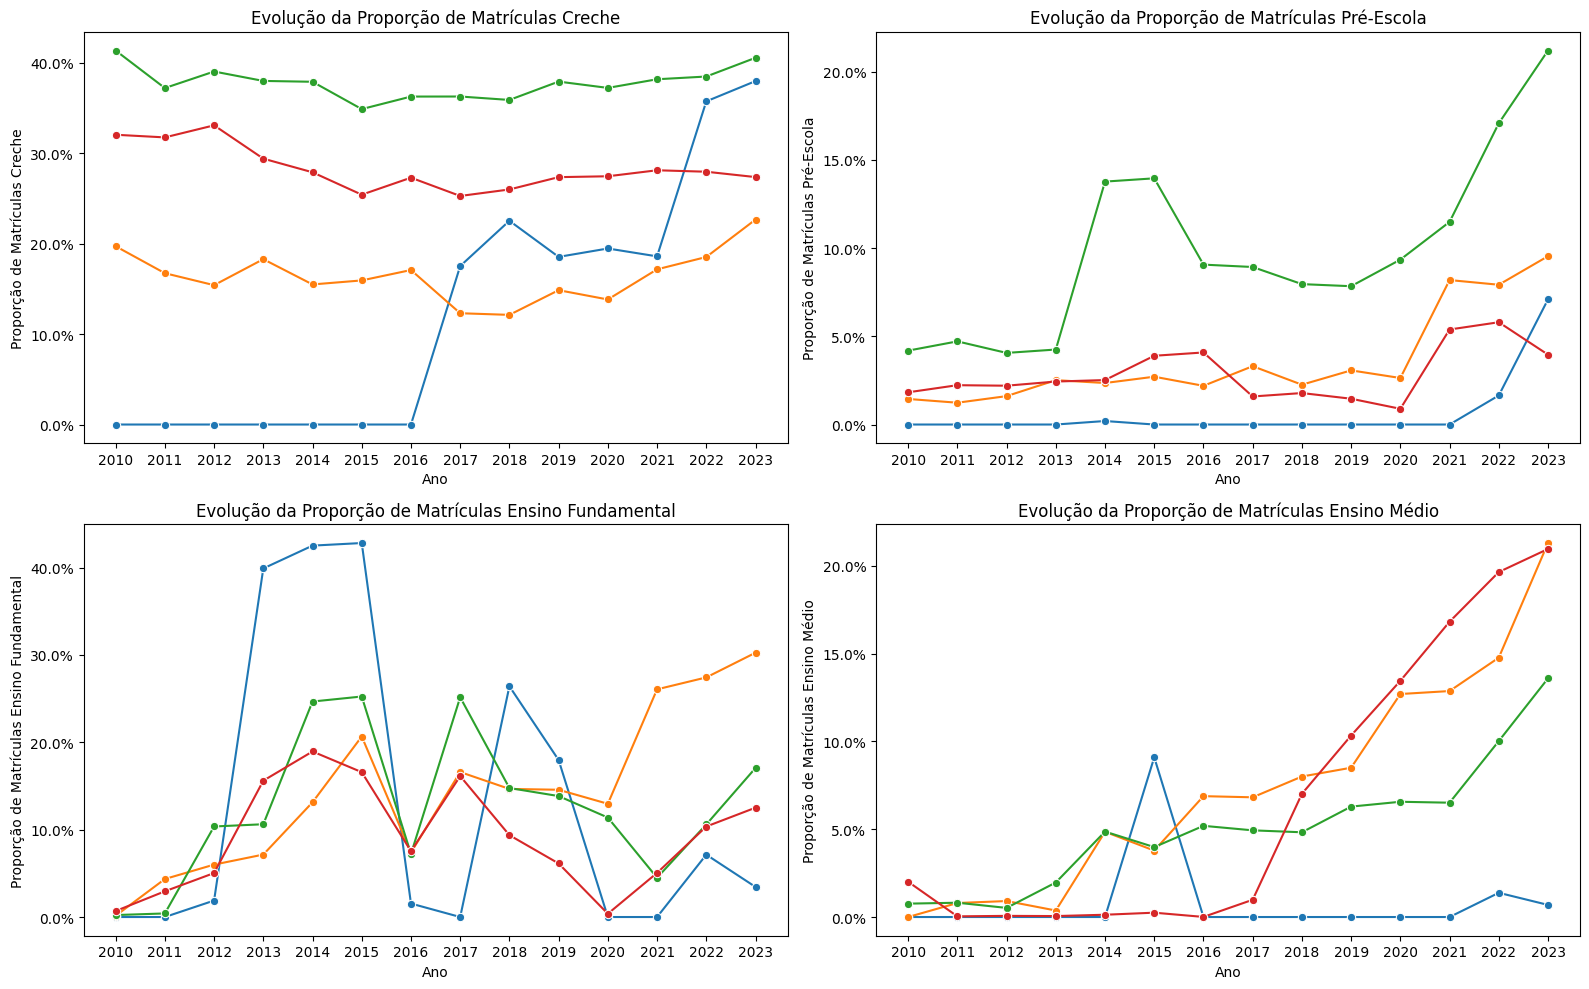

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter

# Dicionário com os rótulos completos das variáveis de proporção
rotulos_completos_prop = {
    'Prop_QT_MAT_INF_CRE': 'Proporção de Matrículas Creche',
    'Prop_QT_MAT_INF_PRE': 'Proporção de Matrículas Pré-Escola',
    'Prop_QT_MAT_FUND': 'Proporção de Matrículas Ensino Fundamental',
    'Prop_QT_MAT_MED': 'Proporção de Matrículas Ensino Médio'
}

# Lista de colunas de proporção para plotar
colunas_para_plotar_prop = ['Prop_QT_MAT_INF_CRE', 'Prop_QT_MAT_INF_PRE', 'Prop_QT_MAT_FUND', 'Prop_QT_MAT_MED']

# Criando a figura com subplots em um grid 2x2
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))

# Loop para criar os gráficos em cada subplot
for i, coluna in enumerate(colunas_para_plotar_prop):
    linha = i // 2
    coluna_grid = i % 2

    sns.lineplot(x='ano', y=coluna, hue='grupo', data=df, marker='o', legend=False, ax=axes[linha, coluna_grid])

    axes[linha, coluna_grid].set_title(f'Evolução da {rotulos_completos_prop.get(coluna, coluna)}')
    axes[linha, coluna_grid].set_xlabel('Ano')
    axes[linha, coluna_grid].set_ylabel(rotulos_completos_prop.get(coluna, coluna))
    axes[linha, coluna_grid].set_xticks(df['ano'].unique())
    
    # Formatando o eixo y como percentual
    axes[linha, coluna_grid].yaxis.set_major_formatter(PercentFormatter(1))

# Ajustando o espaçamento entre os subplots
plt.tight_layout()

# Mostrando a figura com todos os gráficos
plt.show()


In [19]:
df['grupo'] = str(df.index)
#df = df.reset_index(drop=True, inplace=True)
# Ordenar o DataFrame por ano
df = df.sort_values('ano')

# Dicionário com os rótulos completos das variáveis de proporção
rotulos_completos_prop = {
    'Prop_QT_MAT_INF_CRE': 'Proporção de Matrículas Creche',
    'Prop_QT_MAT_INF_PRE': 'Proporção de Matrículas Pré-Escola',
    'Prop_QT_MAT_FUND': 'Proporção de Matrículas Ensino Fundamental',
    'Prop_QT_MAT_MED': 'Proporção de Matrículas Ensino Médio'
}

# Lista de colunas de proporção para plotar
colunas_para_plotar_prop = ['Prop_QT_MAT_INF_CRE', 'Prop_QT_MAT_INF_PRE', 'Prop_QT_MAT_FUND', 'Prop_QT_MAT_MED']

# Loop para criar e salvar cada gráfico individualmente
for coluna in colunas_para_plotar_prop:
    # Filtra os dados para a coluna atual
    df_filtrado = df[['ano', 'grupo', coluna]].rename(columns={coluna: 'proporcao'})

    # Crie o gráfico de barras com os dados filtrados
    chart = alt.Chart(df_filtrado).mark_bar().encode(
        x=alt.X('ano:N', axis=alt.Axis(title='Ano', labelAngle=-45)),
        y=alt.Y('proporcao:Q', axis=alt.Axis(title=rotulos_completos_prop.get(coluna, coluna), titleFontSize=12)),
        color='grupo:N',
        column='grupo:N',
        tooltip=['ano', 'grupo', alt.Tooltip('proporcao:Q', title=rotulos_completos_prop.get(coluna, coluna), format='.1f')]
    ).properties(
        title=f'Evolução da {rotulos_completos_prop.get(coluna, coluna)}',
    )
    chart.show()


alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

In [20]:
# Convert 'ano' column to numeric (ensure year values are valid)
df['ano'] = pd.to_numeric(df['ano'], errors='coerce')

# Columns for calculations
columns = ['QT_MAT_INF', 'QT_MAT_INF_CRE', 'QT_MAT_INF_PRE', 'QT_MAT_FUND', 'QT_MAT_MED']

# Group by 'grupo' and calculate 
grouped = df.groupby('grupo')

# Create figure with specified subplot layout
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))  # Increased to 3 cols for potential additional groups
axes = axes.flatten()  # Makes it easier to iterate

# Iterate through groups and create subplots
for i, (group_name, group_data) in enumerate(grouped):
    # Sort data by year for each group (ascending order is default)
    group_data = group_data.sort_values(by='ano')

    # Determine the number of years for the x-axis ticks
    years = group_data['ano'].unique()
    year_ticks = range(years.min(), years.max() + 1)

    # Plot each against year
    for prop_col in columns:
        axes[i].plot(group_data['ano'], group_data[prop_col], label=prop_col, marker='o')  # Added markers for better visualization

    # Add plot customizations
    axes[i].set_title(group_name)
    axes[i].set_xlabel('Ano')
    axes[i].set_ylabel('Proporção')
    axes[i].legend(loc='upper right', fontsize=9)  
    axes[i].set_xticks(year_ticks)
    axes[i].set_xlim([years.min() - 0.5, years.max() + 0.5])  # Adjust limits for space around data points

    # Disable grid lines for this subplot (optional)
    axes[i].grid(axis='y', linestyle='--')  # Only enable vertical gridlines

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

# Adjust subplot spacing to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()


ValueError: 'grupo' is both an index level and a column label, which is ambiguous.

In [111]:
'''# Filter columns starting with 'Prop', the `ano` column, and include the index levels
df_prop_group = df.filter(regex='Prop|^ano').reset_index() 

# Group by `ano` and the `grupo` index level (not a column anymore), calculate mean for 'Prop' columns
df_prop_group_mean = df_prop_group.groupby(['ano', 'grupo']).mean().reset_index() 

# Melt the DataFrame to long format for plotting
df_prop_group_mean_long = df_prop_group_mean.melt(id_vars=['ano', 'grupo'], var_name='Material Type', value_name='Proportion')

# Create the faceted bar chart using the index level 'grupo'
chart = alt.Chart(df_prop_group_mean_long).mark_bar().encode(
    x=alt.X('ano:O', axis=alt.Axis(title='Year', labelAngle=-45)),
    y=alt.Y('Proportion:Q', axis=alt.Axis(title='Average Proportion of Schools with Material')),
    color=alt.Color('Material Type:N', legend=alt.Legend(title="Material Type")),
    tooltip=['ano', 'grupo', 'Material Type', 'Proportion']
).properties(
    title='Average Proportion of Schools with Different Materials by Year and Group'
).facet(
    column=alt.Column('grupo:N', title='Group')   # Use 'grupo' from the index level
)
# Display the chart
chart.show()'''


alt.FacetChart(...)

In [77]:
# Filter columns starting with 'Prop', the `ano` column, and include the index levels
df_prop_group = df.filter(regex='Prop|^ano').reset_index() 

# Group by `ano` and the `grupo` index level (not a column anymore), calculate mean for 'Prop' columns
df_prop_group_mean = df_prop_group.groupby(['ano', 'grupo']).mean().reset_index() 

# Melt the DataFrame to long format for plotting
df_prop_group_mean_long = df_prop_group_mean.melt(id_vars=['ano', 'grupo'], var_name='Material Type', value_name='Proportion')

# Get the unique groups from the DataFrame
unique_groups = df_prop_group_mean_long['grupo'].unique()

# Crie o dicionário de mapeamento (substitua pelos seus rótulos desejados)
label_map = {
    'Prop_QT_MAT_FUND': 'Prop Fundamental',
    'Prop_QT_MAT_INF': 'Prop Infantil',
    'Prop_QT_MAT_INF_CRE': 'Prop Creche',
    'Prop_QT_MAT_INF_PRE': 'Prop Pre Escola',
    'Prop_QT_MAT_MED': 'Prop Ensino Médio',
}

# Combine all charts into a single figure
fig = alt.vconcat()  # Start with a vertical concatenation

for i, group in enumerate(unique_groups):
    group_data = df_prop_group_mean_long[df_prop_group_mean_long['grupo'] == group]
    group_data['Nível Escolar'] = group_data['Material Type'].map(label_map)

    chart = alt.Chart(group_data).mark_bar().encode(
        x=alt.X('ano:O', axis=alt.Axis(title='Anos', labelAngle=-45)),
        y=alt.Y('Proportion:Q', axis=alt.Axis(title='Proporção de Ensino Integral')),
        color=alt.Color('Nível Escolar:N', legend=alt.Legend(title="Nível Escolar")),
        tooltip=['ano', 'Nível Escolar', 'Proportion']
    ).properties(
        title=f'Proporção de Matrículas em Período Integral para o {group}'
    )

    if i % 2 == 0:
        row = chart  # Start a new row if it's an even index
    else:
        row = alt.hconcat(row, chart)  # Concatenate horizontally if it's an odd index
        fig = alt.vconcat(fig, row)  # Add the completed row to the figure

# Show the combined figure
fig.show()


C:\Users\DESKTOP 15\AppData\Local\Temp\ipykernel_10188\3480528828.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_data['Nível Escolar'] = group_data['Material Type'].map(label_map)
C:\Users\DESKTOP 15\AppData\Local\Temp\ipykernel_10188\3480528828.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_data['Nível Escolar'] = group_data['Material Type'].map(label_map)
C:\Users\DESKTOP 15\AppData\Local\Temp\ipykernel_10188\3480528828.py:27: SettingWithCopyWarning: 
A value is trying to be set on

alt.VConcatChart(...)

In [35]:
# Filter columns starting with 'Prop', the `ano` column, and include the index levels
df_prop_group = df.filter(regex='Prop|^ano').reset_index() 

# Group by `ano` and the `grupo` index level (not a column anymore), calculate mean for 'Prop' columns
df_prop_group_mean = df_prop_group.groupby(['ano', 'grupo']).mean().reset_index() 

# Melt the DataFrame to long format for plotting
df_prop_group_mean_long = df_prop_group_mean.melt(id_vars=['ano', 'grupo'], var_name='Material Type', value_name='Proportion')

# Get the unique groups from the DataFrame
unique_groups = df_prop_group_mean_long['grupo'].unique()

# Crie o dicionário de mapeamento (substitua pelos seus rótulos desejados)
label_map = {
    'Prop_QT_MAT_FUND': 'Prop Fundamental',
    'Prop_QT_MAT_INF': 'Prop Infantil',
    'Prop_QT_MAT_INF_CRE': 'Prop Creche',
    'Prop_QT_MAT_INF_PRE': 'Prop Pre Escola',
    'Prop_QT_MAT_MED': 'Prop Ensino Médio',
}

for group in unique_groups:
    group_data = df_prop_group_mean_long[df_prop_group_mean_long['grupo'] == group]

    # Crie a nova coluna com os rótulos personalizados
    group_data['Nível Escolar'] = group_data['Material Type'].map(label_map)

    chart = alt.Chart(group_data).mark_bar().encode(
        x=alt.X('ano:O', axis=alt.Axis(title='Anos', labelAngle=-45)),
        y=alt.Y('Proportion:Q', axis=alt.Axis(title='Proporção de Ensino Integral')),
        color=alt.Color('Nível Escolar:N', legend=alt.Legend(title="Nível Escolar")),  # Use a nova coluna e título personalizado
        tooltip=['ano', 'Nível Escolar', 'Proportion']  
    ).properties(
        title=f'Proporção de Matrículas em Período Integral para o  {group}' 
    )
        
    chart.show()

C:\Users\DESKTOP 15\AppData\Local\Temp\ipykernel_13120\460586627.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_data['Nível Escolar'] = group_data['Material Type'].map(label_map)


alt.Chart(...)

C:\Users\DESKTOP 15\AppData\Local\Temp\ipykernel_13120\460586627.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_data['Nível Escolar'] = group_data['Material Type'].map(label_map)


alt.Chart(...)

C:\Users\DESKTOP 15\AppData\Local\Temp\ipykernel_13120\460586627.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_data['Nível Escolar'] = group_data['Material Type'].map(label_map)


alt.Chart(...)

C:\Users\DESKTOP 15\AppData\Local\Temp\ipykernel_13120\460586627.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_data['Nível Escolar'] = group_data['Material Type'].map(label_map)


alt.Chart(...)

In [113]:
# Mesmo gráfico porem em escala diferente
'''for group in unique_groups:
    group_data = df_prop_group_mean_long[df_prop_group_mean_long['grupo'] == group]
    chart = alt.Chart(group_data).mark_bar().encode(
        x=alt.X('ano:O', axis=alt.Axis(title='Year', labelAngle=-45)),
        y=alt.Y('Proportion:Q', axis=alt.Axis(title='Average Proportion of Schools with Material')),
        color=alt.Color('Material Type:N'), 
        tooltip=['ano', 'Material Type', 'Proportion'] 
    ).properties(
        width=800,  # Adjust width as needed 
        height=400, # Adjust height as needed
        title=f'Average Proportion of Schools with Different Materials for Group {group}'
    )

    legend = alt.Chart(group_data).mark_circle().encode(
        y=alt.Y('Material Type:N', axis=alt.Axis(orient='right')),
        color=alt.Color('Material Type:N', legend=None)
    ).add_selection(
        alt.selection_single(on='mouseover', nearest=True, empty='none')
    )
        
    chart_with_legend = chart | legend
    chart_with_legend.show()
'''

c:\Users\DESKTOP 15\AppData\Local\Programs\Python\Python312\Lib\site-packages\altair\utils\deprecation.py:65: AltairDeprecationWarning: 'selection_single' is deprecated.  Use 'selection_point'
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)
c:\Users\DESKTOP 15\AppData\Local\Programs\Python\Python312\Lib\site-packages\altair\vegalite\v5\api.py:398: AltairDeprecationWarning: The value of 'empty' should be True or False.
  warnings.warn(
c:\Users\DESKTOP 15\AppData\Local\Programs\Python\Python312\Lib\site-packages\altair\utils\deprecation.py:65: AltairDeprecationWarning: 'add_selection' is deprecated. Use 'add_params' instead.
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)


alt.HConcatChart(...)

c:\Users\DESKTOP 15\AppData\Local\Programs\Python\Python312\Lib\site-packages\altair\utils\deprecation.py:65: AltairDeprecationWarning: 'selection_single' is deprecated.  Use 'selection_point'
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)
c:\Users\DESKTOP 15\AppData\Local\Programs\Python\Python312\Lib\site-packages\altair\vegalite\v5\api.py:398: AltairDeprecationWarning: The value of 'empty' should be True or False.
  warnings.warn(
c:\Users\DESKTOP 15\AppData\Local\Programs\Python\Python312\Lib\site-packages\altair\utils\deprecation.py:65: AltairDeprecationWarning: 'add_selection' is deprecated. Use 'add_params' instead.
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)


alt.HConcatChart(...)

c:\Users\DESKTOP 15\AppData\Local\Programs\Python\Python312\Lib\site-packages\altair\utils\deprecation.py:65: AltairDeprecationWarning: 'selection_single' is deprecated.  Use 'selection_point'
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)
c:\Users\DESKTOP 15\AppData\Local\Programs\Python\Python312\Lib\site-packages\altair\vegalite\v5\api.py:398: AltairDeprecationWarning: The value of 'empty' should be True or False.
  warnings.warn(
c:\Users\DESKTOP 15\AppData\Local\Programs\Python\Python312\Lib\site-packages\altair\utils\deprecation.py:65: AltairDeprecationWarning: 'add_selection' is deprecated. Use 'add_params' instead.
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)


alt.HConcatChart(...)

0.7615
